# Методичка 1.1 Тема: Линейная регрессия
Работу выполнил студент 2 курса Саркисян Мгер ПМ22-5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Для начала считаем данные о котировке двух инструментов из csv-файла:

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

Посмотрим формат файла с данными - состав и названия полей:

In [3]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


Аналогичная картина наблюдается и в переменной y. Здесь мы видим две проблемы. Во-первых, при считывании данных из файла pandas добавил специальный стоблец с номером строки. Он нам не нужен. Во-вторых, мы получили объекты типа DataFrame, а для дальнейшей работы нам нужен объект типа Series. Эти проблемы можно решить разными способами, но прощевсего взять из получившихся датафреймов одну нужную колонку:

In [4]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

Затем выделим из получившегося объединенного датасета результативный и факторный признак. В нашем случае это будут цены закрытия двух этих инструментов:

In [5]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

Для визуального представления совместного распределения значений используемых переменных построим график зависимости одной переменной от другой:

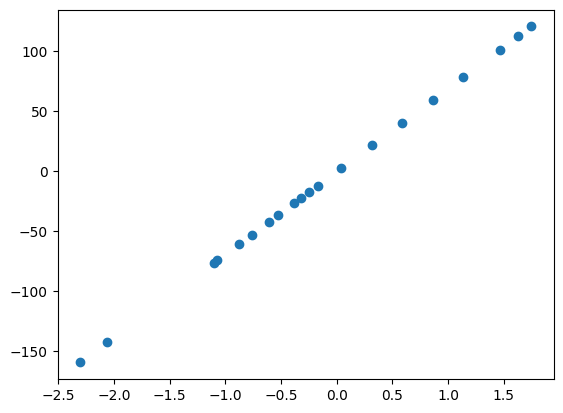

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

Мы видим, что линейная зависимость прослеживается в данных. Значит, мы можем продолжать и использовать парную линейную регрессию.

Начнем строить класс, который будет реализовывать метод парной линейной регрессии:

In [25]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1


Здесь мы определили конструктор класса, который запоминает в полях экземпляра параметры регрессии. В дальнейшем мы сможем расширять функциональность этого класса сколь угодно много.

Реализуем метод, который принимает значение входной переменной и возвращает теоретическое значение выходной - это прямое действие нашей регрессии - метод предсказания результата по факторам (в случае парной регрессии - по одному фактору):

In [14]:
    def predict(self, x):
        return self.b0 + self.b1 * x

Теперь зададим функцию ошибки:

In [ ]:
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

В данном случае мы используем простую функцию ошибки - среднеквадратическое отклонение (mean squared error, MSE). Можно использовать и другие функции ошибки. Именно вид функции ошибки будет определять то, какой вид регрессии мы реализуем. Существует много разных вариаций простого алгоритма регрессии. О большинстве распространенных методах регрессии можно почитать в официальной документации sklearn.

Теперь реализуем метод градиентного спуска. Он должен принимать массив X и массив Y и обновлять параметры регрессии в соответствии в формулами градиентного спуска:

In [ ]:
    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

Здесь мы используем некоторое произвольное число - alpha - скорость обучения. О выборе конкретного значения alpha - скорости обучения мы еще поговорим позднее.

Давайте создадим объект регрессии и проверим начальное значение ошибки:

In [26]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


Как мы видим, для начала оба параметра регрессии равны нулю. Конечно, такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения мы постепенно его улучшаем и приходим к оптимальному решению.

Теперь изобразим нашу регрессию на графике:

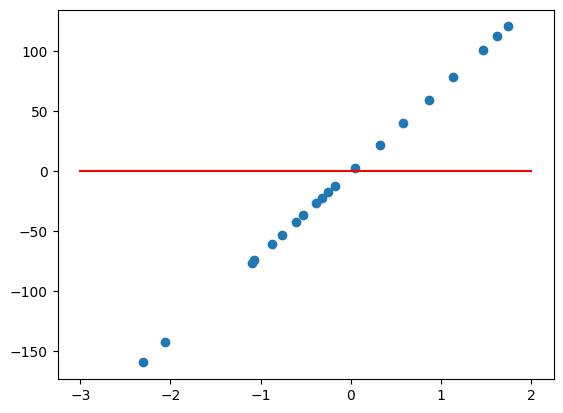

In [27]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Как и ожидалось, мы видим горизонтальную линию - в нашей примитивной модели пока для любого входного значения, выходное всегда будет 0.

Теперь все готово к запуску градиентного спуска.

In [28]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


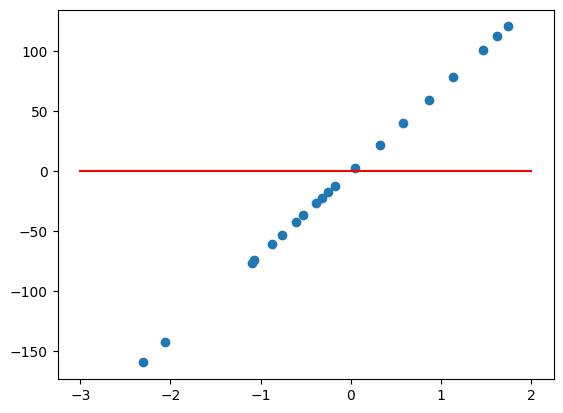

In [30]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Как мы видим, численное значение ошибки значительно уменьшилось. Да и линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска. Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

In [34]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors

Заодно мы расширили функциональность этого метода так, чтобы он возвращал массив ошибок на каждой итерации спуска и номер итерации. Это будет нам полезно для построения графика обучения.

Запустим наш градиентный спуск:

In [35]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


Как мы видим, теперь ошибка снизилась гораздо больше. Однако, она все еще не достигла нуля. Заметим, что нулевая ошибка не всегда возможна в принципе из-за того, что точки данных не всегда будут располагаться на одной линии. Кроме того, алгоритм градиентного спуска - численный и сходится в пределе, то есть после бесконечного количества повторений. Нужно стремиться не к нулевой, а к минимально возможной ошибке.

Посмотрим, как теперь наша регрессия выглядит на графике:

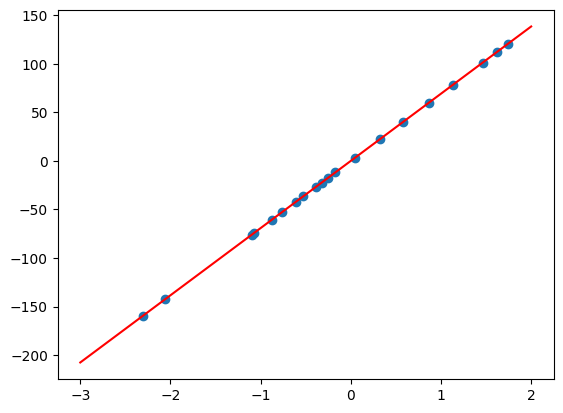

In [36]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Уже значительно лучше. Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:

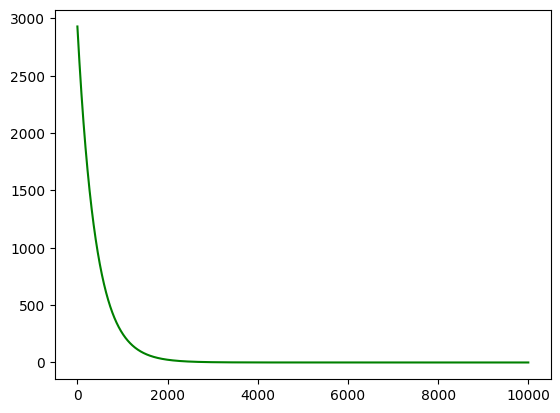

In [37]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

## Задачи для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [42]:
arr1, arr2 = np.linspace(0, 100, 30), np.linspace(0, 100, 10)
np.random.shuffle(arr1), np.random.shuffle(arr2)

(None, None)

In [43]:
for bo, b1 in zip(arr1, arr2):
    print(f'b0: {bo}, b1 {b1}')
    hyp = Model()
    hyp.bo = bo
    hyp.b1 = b1
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

b0: 6.896551724137931, b1 100.0
error after gradient descent: 5.507595059727459e-07
b0: 93.10344827586206, b1 44.44444444444444
error after gradient descent: 3.5516337061774463e-07
b0: 24.137931034482758, b1 22.22222222222222
error after gradient descent: 1.279592800238076e-06
b0: 82.75862068965517, b1 11.11111111111111
error after gradient descent: 1.956664918763352e-06
b0: 20.689655172413794, b1 88.88888888888889
error after gradient descent: 2.2516374061782676e-07
b0: 27.586206896551722, b1 0.0
error after gradient descent: 2.776975306057215e-06
b0: 68.9655172413793, b1 66.66666666666666
error after gradient descent: 3.6870174238717616e-09
b0: 13.793103448275861, b1 55.55555555555556
error after gradient descent: 1.0780605943578258e-07
b0: 0.0, b1 77.77777777777777
error after gradient descent: 4.2806244475453594e-08
b0: 41.37931034482759, b1 33.33333333333333
error after gradient descent: 7.457589508102316e-07


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [44]:
for alpha in (np.linspace(0, 1, 30)):
    print(f'alpha: {alpha}')
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

alpha: 0.0
error after gradient descent: 2937.6446095153397
alpha: 0.034482758620689655
error after gradient descent: 1.6877462130454616e-26
alpha: 0.06896551724137931
error after gradient descent: 4.294341831274253e-27
alpha: 0.10344827586206896
error after gradient descent: 1.6583631164782415e-27
alpha: 0.13793103448275862
error after gradient descent: 9.067167244610309e-28
alpha: 0.1724137931034483
error after gradient descent: 3.7794819007204433e-28
alpha: 0.20689655172413793
error after gradient descent: 3.7794819007204442e-28
alpha: 0.24137931034482757
error after gradient descent: 7.948266658167459e-29
alpha: 0.27586206896551724
error after gradient descent: 7.885157785749778e-29
alpha: 0.3103448275862069
error after gradient descent: 7.885157785749778e-29
alpha: 0.3448275862068966
error after gradient descent: 7.885157785749778e-29
alpha: 0.3793103448275862
error after gradient descent: 7.948266658167459e-29
alpha: 0.41379310344827586
error after gradient descent: 7.94826665816

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [45]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [46]:
hyp = Model()
steps, errors = hyp.fit((x, y))
hyp.error(x, y)

2.3101647145272472e-10

In [47]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673
5,-0.611756,-42.326026
6,0.319039,22.073585
7,-0.761207,-52.666163
8,0.582815,40.323651
9,-1.099891,-76.098960


In [48]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

2.3101647145272472e-10

In [49]:
hyp = Model()
steps, errors = hyp.fit((df['x'], df['y']))
hyp.error(x, y)

2.3101647145272472e-10

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [50]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        return steps, errors

In [51]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться


0.0005244076717215663

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [52]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')

        return steps, errors

In [53]:
hyp = Model()
hyp.eps = 1e-3
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться


0.47536984815996747

In [54]:
hyp = Model()
hyp.eps = 1e-9
steps, errors = hyp.fit(df, max_steps=10_000)
hyp.error(x, y)

Модель обучилась успешно. Количество шагов закончилось.


2.776975306057215e-06

6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [55]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')
        return steps, errors

In [56]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=3)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1.5


6.350669614043344e-10

In [57]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=1)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1


2.028157137135308e-12

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [58]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')

        return steps, errors

    def model_plot(self, X=None):
        if X is None:
            X0 = np.linspace(-3, 2, 100)
        else:
            X0 = X
        Y0 = hyp.predict(X0)
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.show()


    def plot_error(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors, 'g')
        plt.show()


In [59]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1


4.1772608368551725e-08

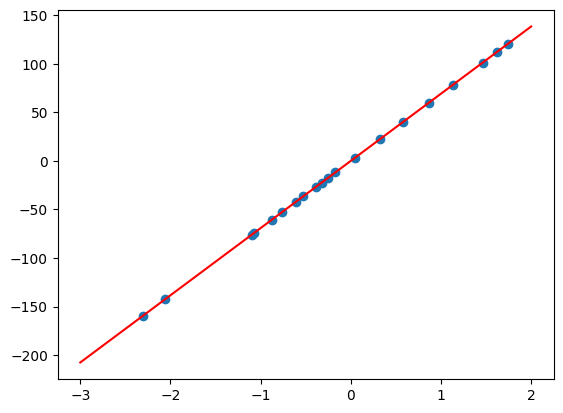

In [60]:
hyp.model_plot()

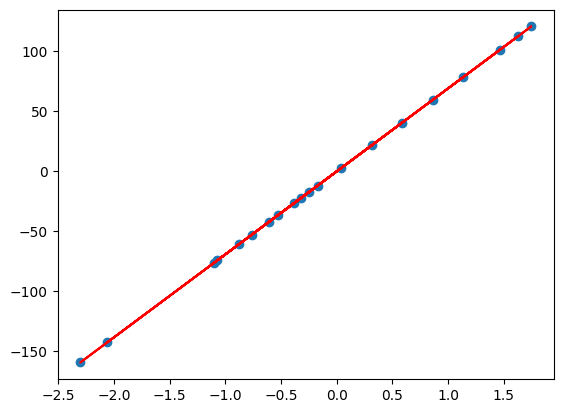

In [61]:
hyp.model_plot(df['x'])

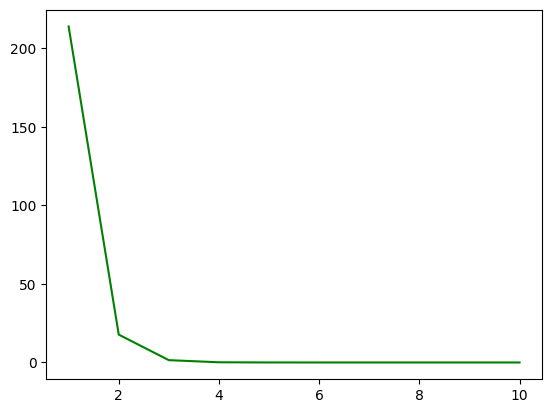

In [62]:
hyp.plot_error(steps, errors)